# Segmentation of mall data set

The aim of this project is doing a segmentation of dataset about the mall clients, which is stored in Mall_Customers.csv file. 

We want to get information about the age, gender, interest etc. to get better view how the distribution of customer in the mall looks like. More iformation and i hope more in depth analysis i will be given in the read me file of this project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
### Data standarization and modeling with K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# reading dataframe:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# check if there are any missing values:
df.isnull().sum()
#df.info()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Ther aren't any missing values so we can try to convert categorical string data into numeric. 

### In our data set we have information about gender which is categorical data in string to make further calculation easier its better to change this to numerical values.

In [5]:
# To do labelling we need labelencoder
from sklearn.preprocessing import LabelEncoder
# Creating instance of label encoder
le = LabelEncoder()

In [6]:
# Using .fit_tranform function to fit labelencoder and return encoded labels
label = le.fit_transform(df['Genre'])
# By this we get the labels where: 1 = male, 0 = female
label

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [7]:
# Transfering labeled information to appropriate collumn
df_labeled = df.copy()
#df_labeled
df_labeled.drop('Genre', axis=1, inplace=True)
df_labeled['Genre']=label
df_labeled = df_labeled.set_index('CustomerID')
df_labeled

,Age,Annual Income (k$),Spending Score (1-100),Genre
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


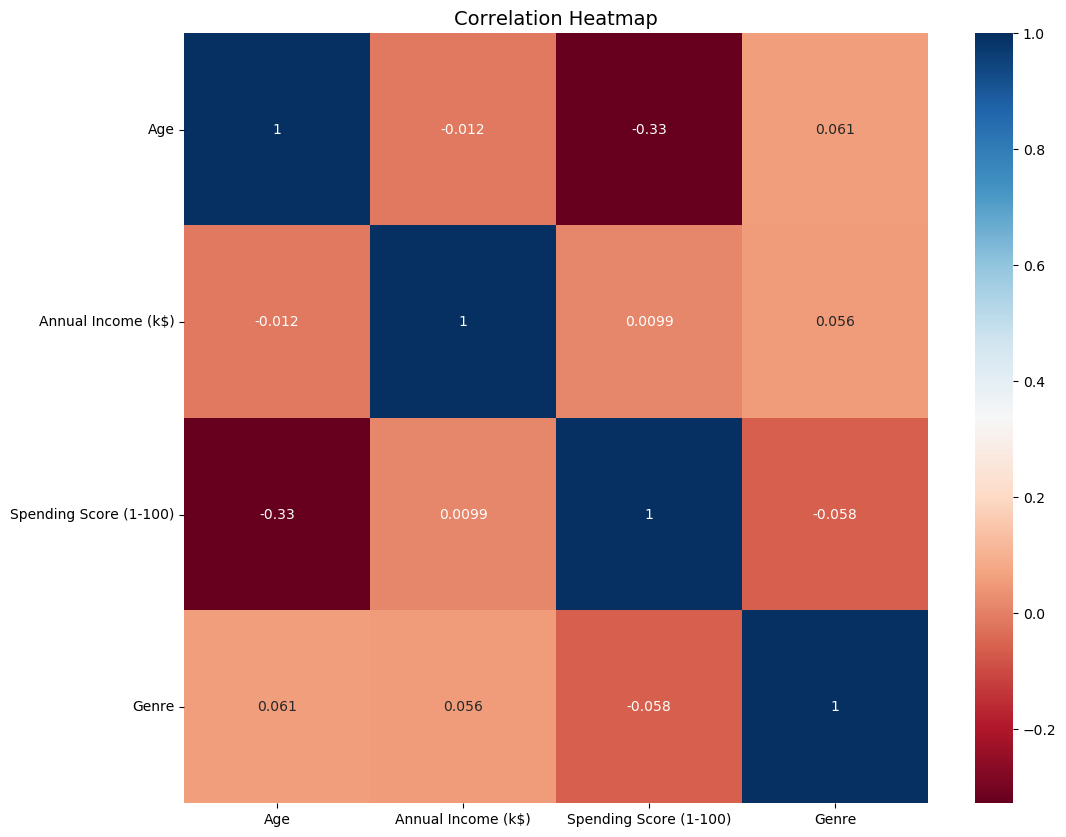

In [8]:
# to check the correlation between data we gonna make a heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(df_labeled.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap', fontsize=14)
plt.yticks(rotation=0)
plt.show()

### As we see in the heat map there aren't any strong corelation between the data, but there is a some distinctive negative correlation between age and the spending score. Which could mean that older people have lower spending score.

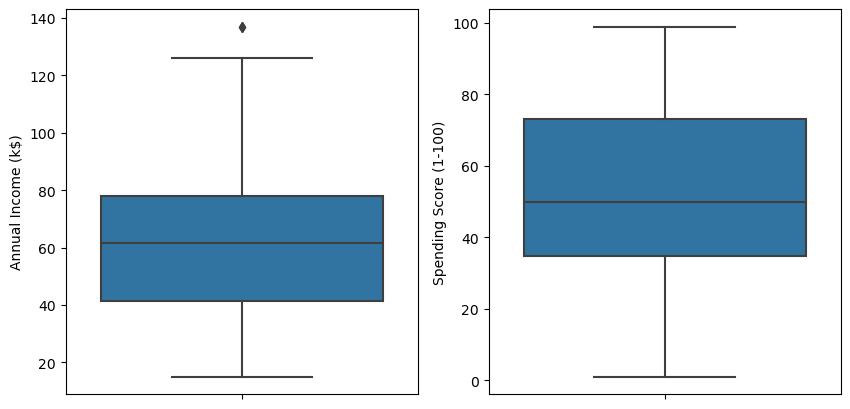

In [9]:
# Checking if data contains any outliers
# From the matplotlib version i have to use figsize=(15,5),
# otherwise it raises error
plt.figure(figsize=(10, 5))
#       nrows=1, n columns=2, nplot=1 
plt.subplot(1, 2, 1)
# Box plot of anual incom data to look for outliers
sns.boxplot(data=df, y='Annual Income (k$)')
plt.subplot(1,2,2)
sns.boxplot(data=df, y='Spending Score (1-100)')
plt.show()

### There are some outliers values which we can see in the boxplot of annual income, but it looks like there is not much of them so i decided to keep them. 

## Ditribution of age, annual income and spending score

Text(0, 0.5, 'Density')

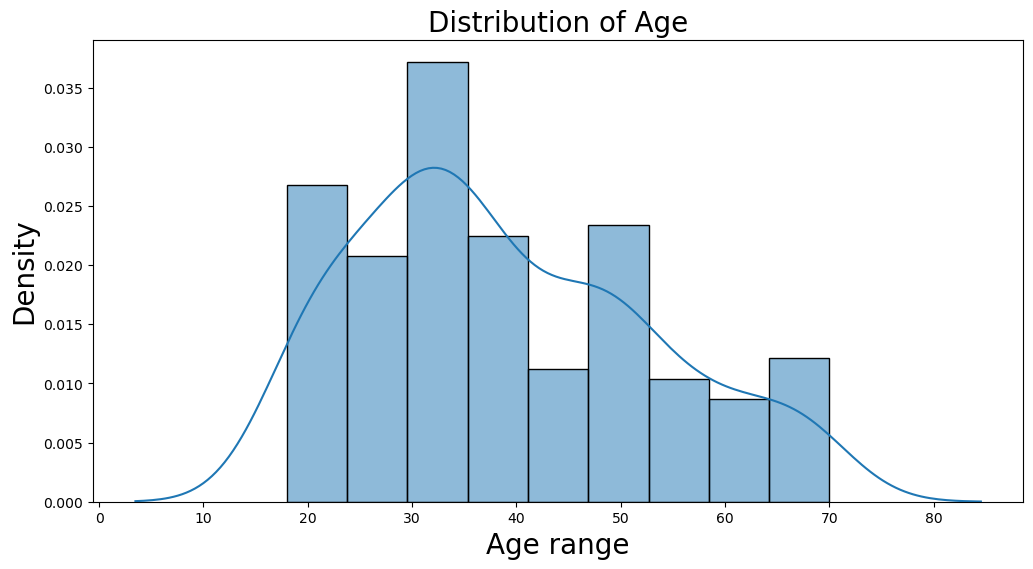

In [10]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df['Age'], kde=True, stat='density', kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of Age", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel("Density", fontsize=20)

### As we see the frequencies of age are not equally distributed in this data. The data shows that there is more right-skewed distribution (positive skew). The patern here is more likely to look like trunkated distribution type. There are several grups of ages which are better represented than the others (E.g. 50, 65-70)

Mean of annual income: 60.56


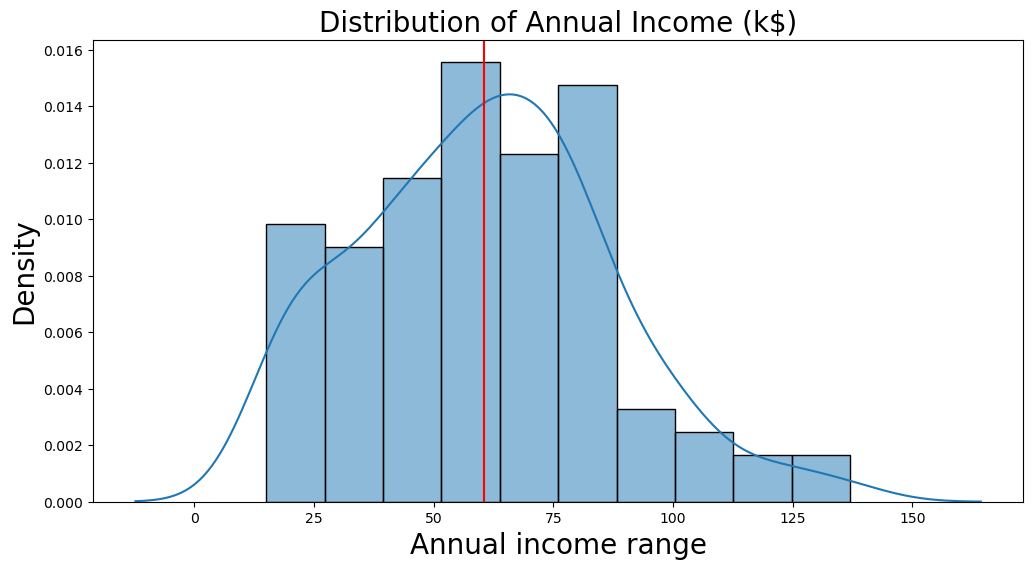

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, stat='density', kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of Annual Income (k$)", fontsize=20)
plt.xlabel('Annual income range', fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.axvline(x=df['Annual Income (k$)'].mean(), color='red')
annual_mean = df['Annual Income (k$)'].mean()
print(f'Mean of annual income: {annual_mean}')

### In this case we see that data are more left-skewed (negative skew). We see that there are more occurances of customers with lower annual income than mean (represented as red line on the histogram). 

Mean of Spending Score (1-100): 50.2


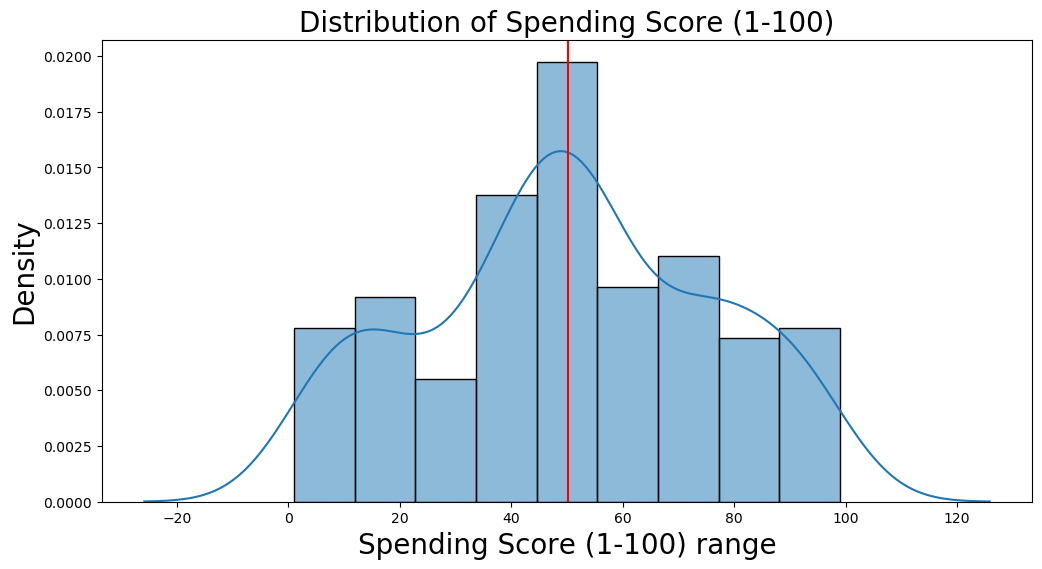

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, stat='density', kde_kws=dict(cut=3))
plt.title("Distribution of Spending Score (1-100)", fontsize=20)
plt.xlabel('Spending Score (1-100) range', fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.axvline(x=df['Spending Score (1-100)'].mean(), color='red')
spending_mean = df['Spending Score (1-100)'].mean()
print(f'Mean of Spending Score (1-100): {spending_mean}')

### In this case there is kind of random patern of distribution, as we can see there are some more reperesented ocurrences on the lower spending side (left from red line which is mean) but we can see this also on the right side of the graph. Also we can see that the most customers have their spending score between 40 to 60 points. 

Female    112
Male       88
Name: Genre, dtype: int64


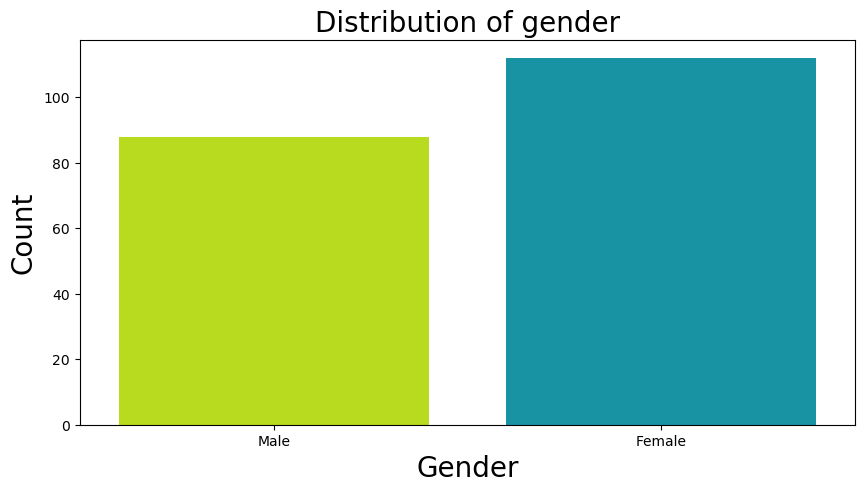

In [13]:
# Distribution of gender
plt.figure(figsize=(10, 5))
# to work in this df have to precise what is x, then give info of data
sns.countplot(x = 'Genre', data=df, palette="nipy_spectral_r")
plt.title("Distribution of gender", fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel("Count", fontsize=20)
counted_values = df['Genre'].value_counts()
print(counted_values)

### As we can see in this set more of the surveyed clients were women. 

## Scater plots of data between columns

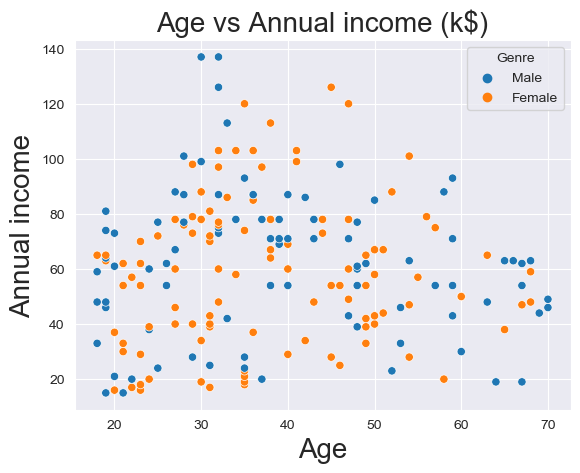

In [14]:
# Age and annual income scatter plot
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Genre')
plt.title('Age vs Annual income (k$)', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Annual income', fontsize=20)
plt.show()

### Most of the points are evenly distributed with small clusters. Further cluster analysis may reval more dependencies. 

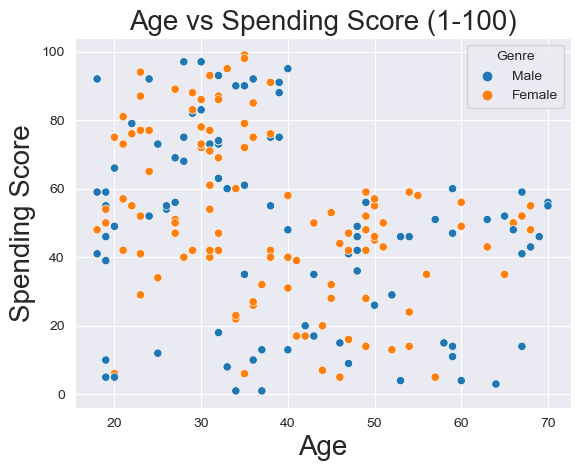

In [15]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre')
plt.title('Age vs Spending Score (1-100)', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Spending Score', fontsize=20)
plt.show()

### The situation here is similar but we can see larger clusters, for example. with a spending score between 40-60. Which would be in line with the earlier information that these limits include the largest number of customers. In addition, we can see that these are not only customers from a specific age range. It is also interesting that customers up to 40 years of age are characterized by higher expenses. 

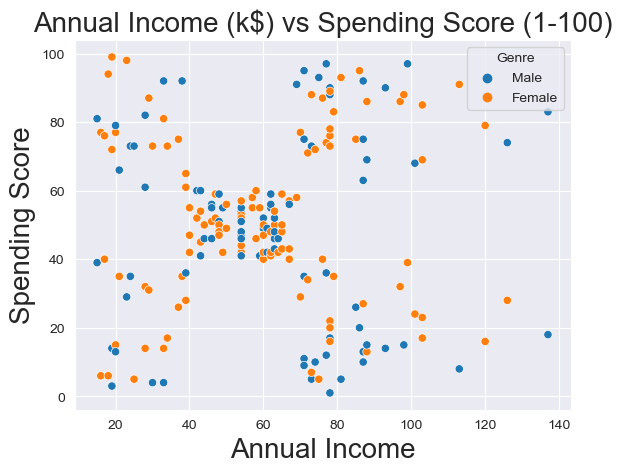

In [16]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Annual Income (k$) vs Spending Score (1-100)', fontsize=20)
plt.xlabel('Annual Income', fontsize=20)
plt.ylabel('Spending Score', fontsize=20)
plt.show()

### For this chart, we see a large cluster of points for both stats between 40 and 60. This was expected for the spending score as we had information from earlier charts that there will be the most counts in this range. However, now we also see that these clients have an annual income at the 40 to 60~65k. 

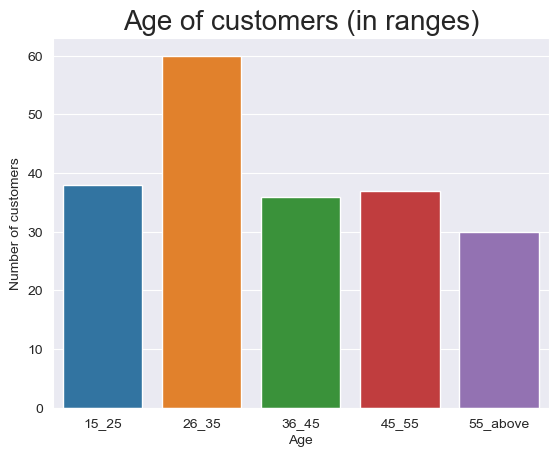

In [34]:
# Barplot of age ranges
df['Age'].min()
# spliting into ranges
Age_15_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36 )& (df.Age<=45)]
Age_45_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_above = df.Age[(df.Age>=55)]
x = ["15_25", "26_35", "36_45", "45_55", "55_above"]
y=[len(Age_15_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_45_55.values),len(Age_55_above.values)]
sns.barplot(x=x, y=y)
plt.title('Age of customers (in ranges)', fontsize=20)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Number of customers', fontsize=10)
plt.show()

### The moste represented group is the age between 26-35.

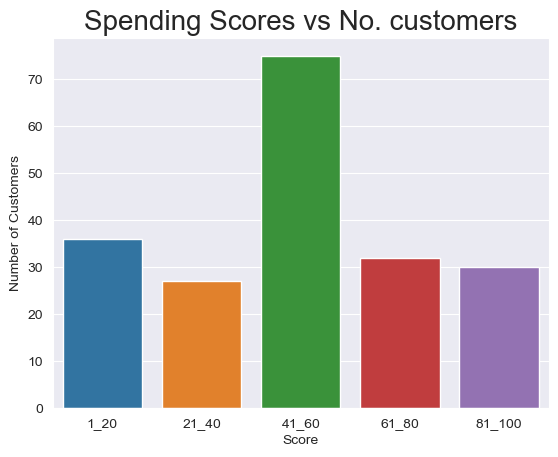

In [38]:
# Barplot of spending score to number of customers
ss1_20= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
ss41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
ss61_80= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]
x=["1_20","21_40","41_60","61_80","81_100"]
y=[len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]
sns.barplot(x=x, y=y)
plt.title("Spending Scores vs No. customers", fontsize=20)
plt.xlabel("Score", fontsize=10)
plt.ylabel("Number of Customers", fontsize=10)
plt.show()

### The moste customers have their spending score in the range of 41-60.

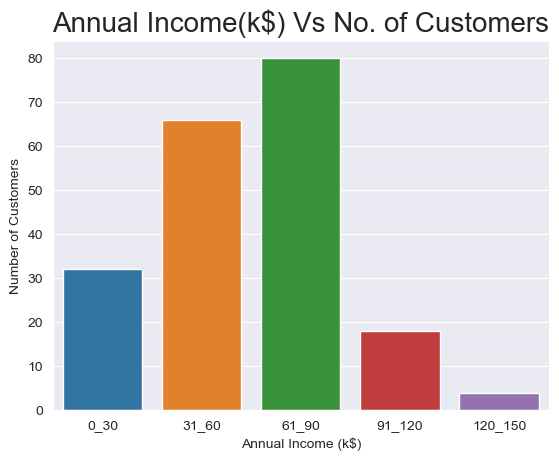

In [39]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
x=["0_30","31_60","61_90","91_120","120_150"]
y=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]
sns.barplot(x=x, y=y)
plt.title("Annual Income(k$) Vs No. of Customers", fontsize=20)
plt.xlabel("Annual Income (k$)", fontsize=10)
plt.ylabel("Number of Customers", fontsize=10)
plt.show()

### Most customers have their annual income in range of 61-90 k, second most represented group have the income in range 31-60 k.

# Clustering in progress
### Next step in our segmentation will be to perform cluster analysis using the Kmeans algorithm. For this step data standarization is required. In general we want to tera all the features equally, so we want all off our values fall in the same numerical range [0,1].

In [17]:
# crating instance of scaler
#scaler = StandardScaler()
#df_std = scaler.fit_transform(df_labeled)
#df_std = pd.DataFrame(data=df_std, columns=df_labeled.columns)
#df_std

In [18]:
# Choosing the number of clusters with Within Clusters Sum of Squares (wcss)
# and Elbow method

# this approach is intersting https://www.kaggle.com/code/konikarani/kmeanscluster
